<a href="https://colab.research.google.com/github/Martinluther123/SN-Bootcamp-projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/sales_data_sample.csv',  encoding = 'latin1')
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
dataset.shape

(2823, 25)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
#Summary statistics of Quantitative variables
vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']

dataset[vars].describe()

#It is observed that there are no negative values for the quantitative variables,
#which is a good sign because we cannot have negative prices or quantities.

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


In [7]:
dataset.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
#Removing the variables which dont add significant value for the analysis.

col_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']
df = dataset.drop(col_drop, axis=1)

In [9]:
#Changing the data type of variable 'ORDERDATE' from object to datetime
dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'])

# Univariate Analysis

Text(0.5, 0, 'Quantity Ordered')

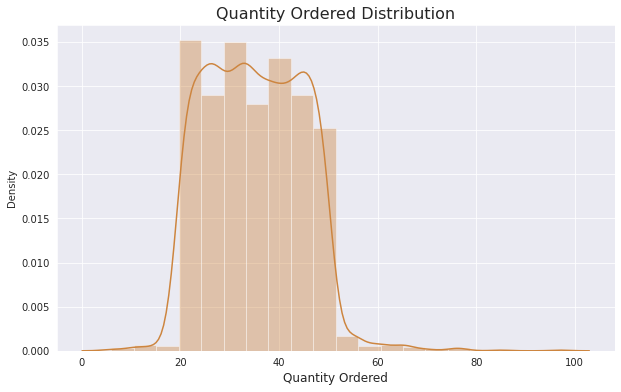

In [10]:
plt.figure(figsize = (10,6))
Quantity = dataset['QUANTITYORDERED'].values
sns.distplot(Quantity, hist=True, kde=True, color='peru', bins = 20)
plt.title('Quantity Ordered Distribution', fontsize = 16)
plt.xlabel('Quantity Ordered',fontsize = 12)

From the distribution plot of quantity , we can see that majority of the
quantity ordered was based between 20 - 40 units

Text(0.5, 0, 'Price')

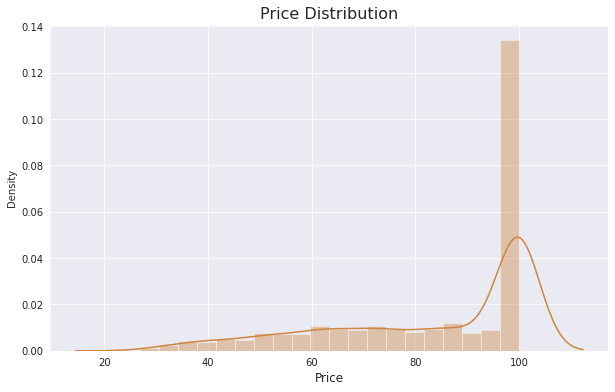

In [11]:
plt.figure(figsize = (10,6))
Price = dataset['PRICEEACH'].values
sns.distplot(Price, hist=True, kde=True, color='peru', bins = 20)
plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price',fontsize = 12)

The distribution of Price is Left Skewed with maximum price of $100, which shows that many of the orders received are of this price.

Text(0.5, 0, 'Sales')

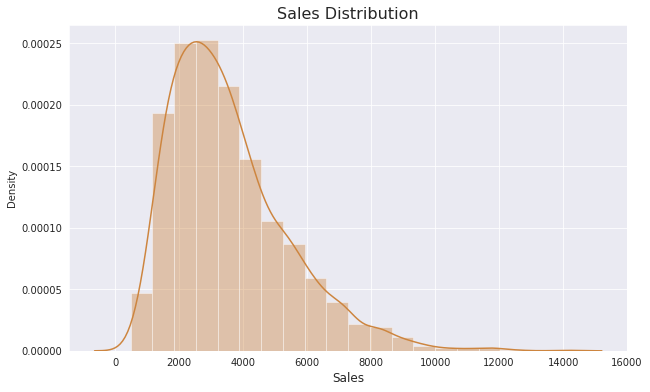

In [12]:
plt.figure(figsize = (10,6))
Sales = dataset['SALES'].values
sns.distplot(Sales, hist=True, kde=True, color='peru', bins = 20)
plt.title('Sales Distribution', fontsize = 16)
plt.xlabel('Sales',fontsize = 12)

From the distribution plot of Sales, it shows that the sales occurs majorly between $2000 -  $6000 

In [13]:
#Analyzing the STATUS variable

dataset['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

In [14]:
#Checking the time range of the data

dataset.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

From the above, it shows that the year 2005 has incomplete data

# Analyzing the KPIs

Text(0.5, 1.0, 'Monthly Revenue')

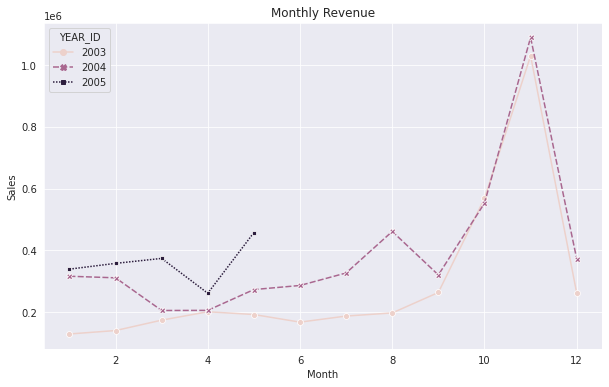

In [15]:
#Monthly Revenue
plt.figure(figsize = (10,6))

monthly_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()

sns.lineplot(data = monthly_revenue, x = 'MONTH_ID', y = 'SALES', hue = 'YEAR_ID',
             style = 'YEAR_ID', markers = True, ci = None )

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')


In [16]:
#Monthly Growth

monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


Text(0.5, 1.0, 'Monthly Sales Growth Rate')

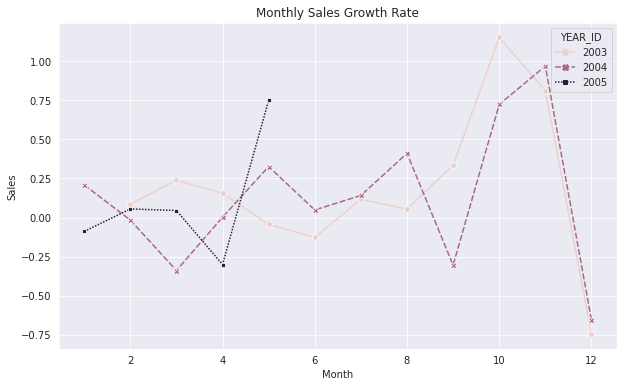

In [17]:
#Monthly Sales Growth Rate

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_revenue, x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID",style = 'YEAR_ID',
             markers = True, ci = None )
 
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')


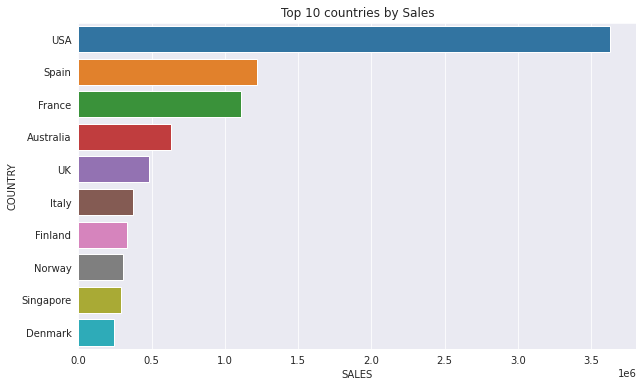

In [18]:
#Top 10 countries by Sales

top_sales=dataset.groupby('COUNTRY').sum().sort_values(by='SALES',ascending=False).head(10)[['SALES']]
fig,ax =plt.subplots(figsize=(10,6))
sns.barplot(top_sales['SALES'],top_sales.index,ax = ax)
plt.title('Top 10 countries by Sales')
plt.show()

#  Active Customers by Months & Year

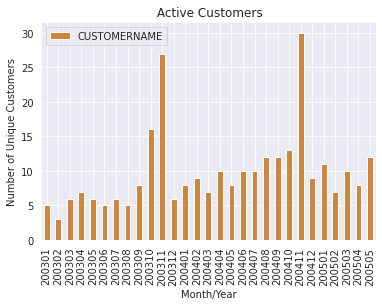

In [19]:
df['YEAR_MONTH'] = df['YEAR_ID'].map(str)+df['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
Active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
Active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME', color = 'peru')
#plt.figure(figsize=(20,10))
plt.title(' Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)

plt.show()

# Average Sales per Order


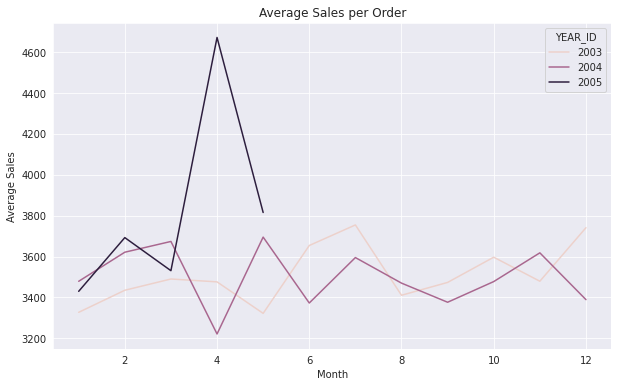

In [20]:
average_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=average_revenue, ci = None )
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

# Dealsize Distribution

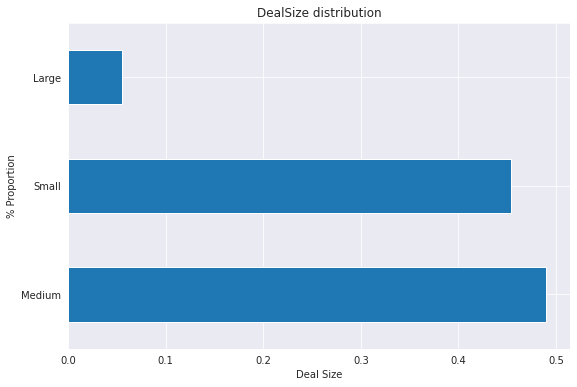

In [21]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize = True).plot(kind = 'barh')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

# Segmentation with number of clusters obtained randomly

In [22]:
dataset['ORDERDATE'] = [d.date() for d in dataset['ORDERDATE']]
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Calculate Recency, Frequency and Monetary value for each customer

In [23]:
rfm_df = dataset.groupby('CUSTOMERNAME').agg({'ORDERDATE':'max','CUSTOMERNAME':'count','SALES':'sum'})

In [24]:
from datetime import timedelta
last_date=(dataset['ORDERDATE'].max() + timedelta(days=1))
rfm_df['Recency']=(last_date-rfm_df['ORDERDATE']).dt.days
rfm_df.head()

,ORDERDATE,CUSTOMERNAME,SALES,Recency
CUSTOMERNAME,,,,
"AV Stores, Co.",2004-11-17,51,157807.81,196
Alpha Cognac,2005-03-28,20,70488.44,65
Amica Models & Co.,2004-09-09,26,94117.26,265
"Anna's Decorations, Ltd",2005-03-09,46,153996.13,84
Atelier graphique,2004-11-25,7,24179.96,188


In [25]:
rfm_df.rename(columns={'CUSTOMERNAME':'Frequency','SALES':'Monetary value'},inplace=True)
rfm_df.drop('ORDERDATE',axis=1,inplace=True)
rfm_df=rfm_df.reset_index()

In [26]:
rfm_df.head()

,CUSTOMERNAME,Frequency,Monetary value,Recency
0,"AV Stores, Co.",51,157807.81,196
1,Alpha Cognac,20,70488.44,65
2,Amica Models & Co.,26,94117.26,265
3,"Anna's Decorations, Ltd",46,153996.13,84
4,Atelier graphique,7,24179.96,188


# Dividing the customer into 4 segments(Randomly Chosen)

Recency/Frequency/MonetaryValue : Level 4 > Level 3> Level 2 > Level 1

The Lower the recency,The higher the Recency level.

The Higher the number of orders,the higher the Frequency level.

The Higher the monetary value,the higher the MonetaryValue level

In [27]:
#Dividing into segments

# Creating a quartile with 4 groups - a range between 1 and 5
Monetaryvalue_quartile = pd.qcut(rfm_df['Monetary value'], q=4, labels=range(1,5))
Recency_quartile = pd.qcut(rfm_df['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(rfm_df['Frequency'], q=4, labels=range(1,5))


# Assigning the quartile values to the Quartile column in data
rfm_df['R'] = Recency_quartile
rfm_df['F'] = Frequency_quartile
rfm_df['M'] = Monetaryvalue_quartile


#print(df_RFM.sort_values('MonetaryValue'))

rfm_df.head()

,CUSTOMERNAME,Frequency,Monetary value,Recency,R,F,M
0,"AV Stores, Co.",51,157807.81,196,2,4,4
1,Alpha Cognac,20,70488.44,65,4,2,2
2,Amica Models & Co.,26,94117.26,265,1,2,3
3,"Anna's Decorations, Ltd",46,153996.13,84,3,4,4
4,Atelier graphique,7,24179.96,188,2,1,1


# Calculating RFM Score

In [28]:
# Calculating RFM_Score
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

,CUSTOMERNAME,Frequency,Monetary value,Recency,R,F,M,RFM_Score
0,"AV Stores, Co.",51,157807.81,196,2,4,4,10
1,Alpha Cognac,20,70488.44,65,4,2,2,8
2,Amica Models & Co.,26,94117.26,265,1,2,3,6
3,"Anna's Decorations, Ltd",46,153996.13,84,3,4,4,11
4,Atelier graphique,7,24179.96,188,2,1,1,4


# Grading the levels

RFM Score > 10 - High Value Customer.

RFM SCore < 10 and RFM Score >= 6 - Mid Value Customer.

RFM Score < 6 - Low Value Customer

In [29]:
#Naming Levels
# Defining rfm_level function
def rfm_level(df):
    if np.bool(df['RFM_Score'] >= 10):
        return 'High Value Customer'
    elif np.bool((df['RFM_Score'] < 10) & (df['RFM_Score'] >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

# Creating a new variable RFM_Level
rfm_df['RFM_Level'] = rfm_df.apply(rfm_level, axis=1)


rfm_df.head()

,CUSTOMERNAME,Frequency,Monetary value,Recency,R,F,M,RFM_Score,RFM_Level
0,"AV Stores, Co.",51,157807.81,196,2,4,4,10,High Value Customer
1,Alpha Cognac,20,70488.44,65,4,2,2,8,Mid Value Customer
2,Amica Models & Co.,26,94117.26,265,1,2,3,6,Mid Value Customer
3,"Anna's Decorations, Ltd",46,153996.13,84,3,4,4,11,High Value Customer
4,Atelier graphique,7,24179.96,188,2,1,1,4,Low Value Customer


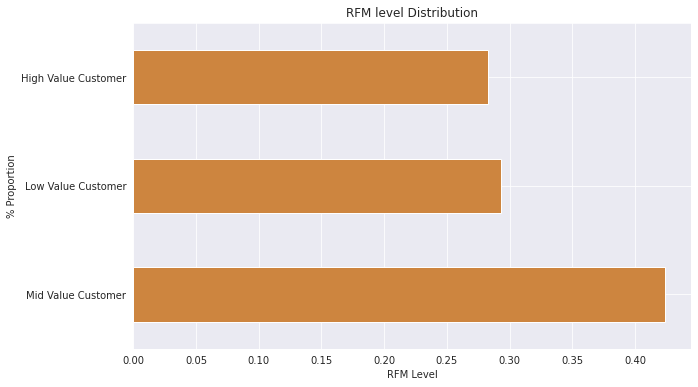

In [30]:
plt.figure(figsize=(10,6))
rfm_df['RFM_Level'].value_counts(normalize = True).plot(kind='barh', color = 'peru')
plt.title('RFM level Distribution')
plt.xlabel('RFM Level')
plt.ylabel('% Proportion')
plt.show()

In [31]:
#Analyzing customer segments
# Calculating average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_df.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary value':['mean','count']}).round(1)

print(rfm_level_agg)

                    Recency Frequency Monetary value      
                       mean      mean           mean count
RFM_Level                                                 
High Value Customer    85.0      54.3       193532.1    26
Low Value Customer    293.8      15.0        52414.6    27
Mid Value Customer    171.2      25.8        91938.5    39


# Segmentation using KMeans Clustering

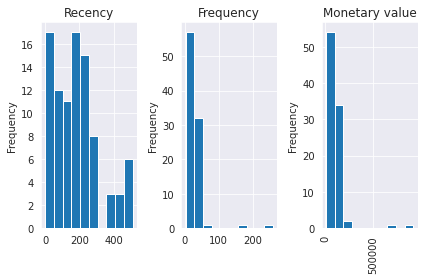

In [32]:
dataset = rfm_df[['Recency','Frequency','Monetary value']]
plt.figure(figsize=(6,4))
plt.subplot(1,3,1)
dataset['Recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
dataset['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
dataset['Monetary value'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('Monetary value')

plt.tight_layout()
plt.show()

From the plot above, it shows that the variables are not normally distributed which will lead to wrong output. in order to solve this problem, Log transformation was done on the data to reduce swekness on the data.

In [33]:
data_log = np.log(dataset)
data_log.head()

,Recency,Frequency,Monetary value
0,5.278115,3.931826,11.969133
1,4.174387,2.995732,11.163204
2,5.579730,3.258097,11.452297
3,4.430817,3.828641,11.944683
4,5.236442,1.945910,10.093279


# Distribution of Recency, Frequency and Monetary value after Log Transformation

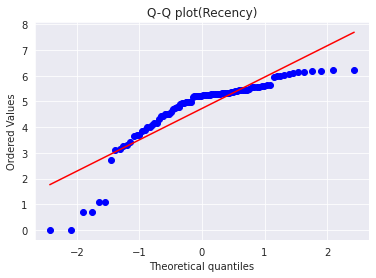

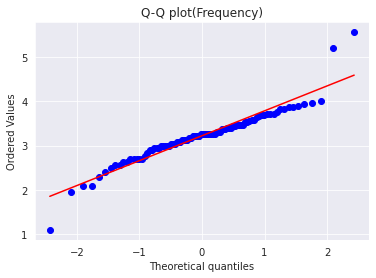

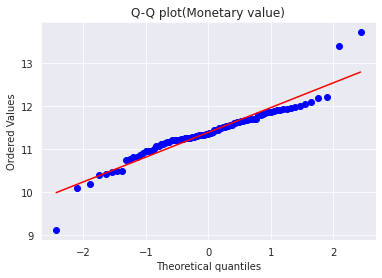

In [34]:
from scipy import stats
def q_qplot(col, df):
    fig,ax=plt.subplots()
    stats.probplot(df[col],dist="norm",plot=ax)
    ax.set_title(f'Q-Q plot({col})')


q_qplot('Recency', data_log)
q_qplot('Frequency',data_log)
q_qplot('Monetary value',data_log)

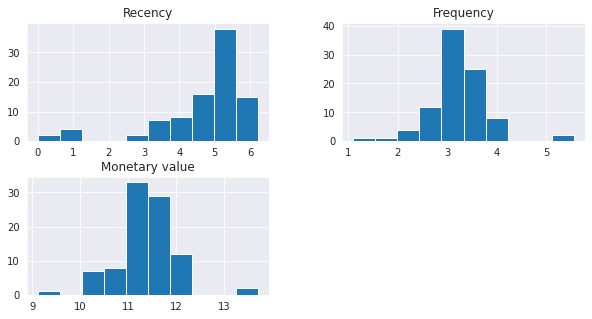

In [35]:
fig,ax=plt.subplots(figsize=(10,5))
data_log.hist(ax=ax)
plt.show()

# Feature Scaling

In [36]:
# Initializing a scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(data_log)

# Scaling and centering the data
data_normalized = scaler.transform(data_log)

# Creating a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index= data_log.index, columns=data_log.columns)

data_normalized.describe().round(2)

,Recency,Frequency,Monetary value
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


# Choosing number of Clusters using Elbow Method

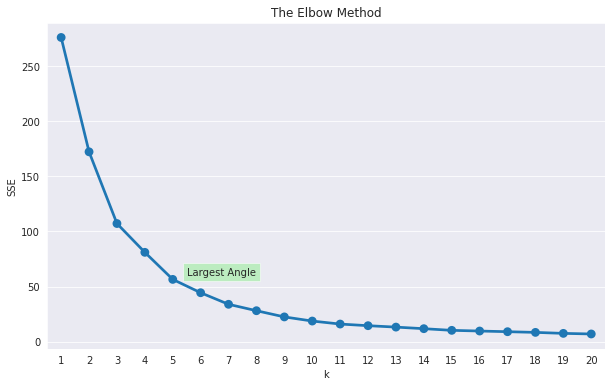

In [37]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

    
plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

# Running KMeans with 5 clusters

In [38]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5, random_state = 1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to original Data
# Create a DataFrame by adding a new cluster label column
data_rfm = dataset.assign(Cluster = cluster_labels)
data_rfm.head()

,Recency,Frequency,Monetary value,Cluster
0,196,51,157807.81,3
1,65,20,70488.44,0
2,265,26,94117.26,0
3,84,46,153996.13,3
4,188,7,24179.96,2


In [39]:
# Grouping the data by cluster
grouped = data_rfm.groupby(by= ['Cluster'])

# Calculating average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary value': ['mean', 'count']
  })

Recency   Frequency Monetary value      
               mean        mean           mean count
Cluster                                             
0        209.162791   22.093023   78633.205814    43
1          2.000000   38.750000  132201.635000     4
2        324.250000   10.666667   35628.653333    12
3        126.548387   37.129032  133158.014516    31
4          2.000000  219.500000  783576.085000     2

Cluster 0 > For some time they haven't transacted and had average frequency.

Cluster 1 > It’s been a long time they haven't transacted and used to transact less.

Cluster 2 > They transacted recently, do so often and spend more than other customers.

Cluster 3 > They transacted recently,and have average frequency.

Cluster 4 > It’s been a long time they haven't transacted but had average frequency.

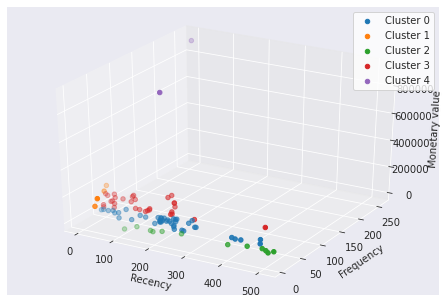

In [40]:
    # Using plot to elaborate the cluster
fig=plt.figure()
ax=Axes3D(fig)
sns.set_style("whitegrid")
for x in range(5):
     ax.scatter(data_rfm.loc[ data_rfm ['Cluster']==x]['Recency'],
               data_rfm.loc[ data_rfm ['Cluster']==x]['Frequency'],
               data_rfm.loc[ data_rfm ['Cluster']==x]['Monetary value'],
               label=f'Cluster {x}')
    ax.legend()
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

# Calculating relative importance of each attribute 

In [41]:
# Calculating average RFM values for each cluster

cluster_avg = data_rfm.groupby(['Cluster']).mean() 
print(cluster_avg)

            Recency   Frequency  Monetary value
Cluster                                        
0        209.162791   22.093023    78633.205814
1          2.000000   38.750000   132201.635000
2        324.250000   10.666667    35628.653333
3        126.548387   37.129032   133158.014516
4          2.000000  219.500000   783576.085000


In [42]:
# Calculating average RFM values for the total customer population
population_avg = dataset.mean()
print(population_avg)

Recency              182.826087
Frequency             30.684783
Monetary value    109050.313587
dtype: float64


In [43]:
# Calculating relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1


print(relative_imp.round(2))

         Recency  Frequency  Monetary value
Cluster                                    
0           0.14      -0.28           -0.28
1          -0.99       0.26            0.21
2           0.77      -0.65           -0.67
3          -0.31       0.21            0.22
4          -0.99       6.15            6.19


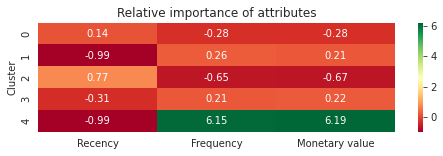

In [44]:
#Plot Relative Importance

# Initializing a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()